
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
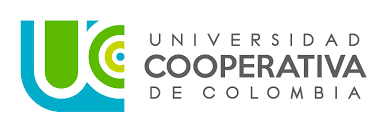
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Electiva III · PEC1</p>
<p style="margin: 0; text-align:right;">Universidad Cooperativa de Colombia</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Ingeniería de Sistemas
 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos cómo aplicar diferentes técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Preprocesado de los datos</li>
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** La solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.
   
Para la realización de la práctica necesitaremos las siguientes librerías:+


<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: /strong>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

A lo largo de esta práctica utilizaremos el conjunto de datos [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/forest+fires), el cual contiene información relevante acerca de distintos incendios acaecidos en el noreste de Portugal. Cada muestra del conjunto de datos estará formada por el área de bosque quemada y el valor de múltiples factores que podrían ser los detonantes o catalizadores del fuego. El conjunto de datos lo encontraréis en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv.

Nota: para los ejercicios de esta PEC, utilizaremos como variable objetivo el "area": número de hectáreas afectadas por el incendio. El resto de variables del conjunto de datos conformarán los atributos descriptivos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Forest Fires Data Set" utilizando el método "read_csv" de "pandas" y mostrad:
<ul>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo).</li>
  <li>Contrastad dichos atributos con los que se describen en la página web del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas.</li>
</ul>
Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo).
</div>

In [2]:
# Cargar el conjunto de datos en el DataFrame df
path='https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
df = pd.read_csv(path)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Mostrar el número de filas del conjunto de datos
print("Número de filas: ", df.shape[0])

Número de filas:  517


In [4]:
# Mostrar el número de atributos descriptivos - opción 1
print("Número de atributos descriptivos opción 1: ", df.shape[1])

# Mostrar el número de atributos descriptivos - opción 2
print("Número de atributos descriptivos opción 2: ", len(df.columns))

# Mostrar los nombres de los atributos descriptivos
print("Nombres de atributos descriptivos: ", df.columns.tolist())

Número de atributos descriptivos opción 1:  13
Número de atributos descriptivos opción 2:  13
Nombres de atributos descriptivos:  ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


                                                           
Los atributos del DataSet coinciden con los atributos de la página. A continuación se relacionala descripción de cda uno de ellos:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).
                     

In [5]:
# Verificar si hay valores faltantes en el conjunto de datos
print("Valores faltantes en el conjunto de datos: ", df.isnull().values.any())

# Verificar en qué columnas hay valores faltantes
print("Valores faltantes por columna: \n", df.isnull().sum())

Valores faltantes en el conjunto de datos:  False
Valores faltantes por columna: 
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia.</li>
      <li>Haced un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma.</li>
    </ul>
  <li>Variables geoespaciales:</li>
    <ul>
      <li>Haced un histograma bidimensional.</li>
    </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de matplotlib.
</div>

In [6]:
# Tipos de datos de cada variable, para identificar variables categoricas y númericas
print(df.dtypes)

# seleccionar variables categóricas
df_categorico = df.select_dtypes(include=['object'])


# seleccionar variables numéricas
df_numerico = df.select_dtypes(include=['int', 'float'])


X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


### Variables Categóricas

In [7]:
print(df_categorico.head())

  month  day
0   mar  fri
1   oct  tue
2   oct  sat
3   mar  fri
4   mar  sun


#### Frecuencia Variables categóricas

In [8]:
frecuencia_month = df_categorico['month'].value_counts()
print("Frecuencia de la variable 'month': \n", frecuencia_month)

Frecuencia de la variable 'month': 
 aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


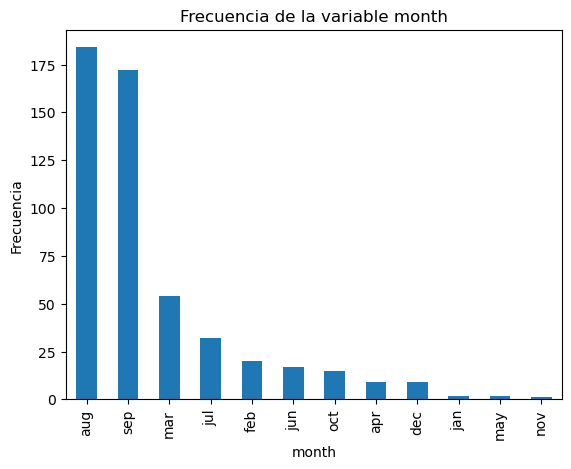

In [9]:
# Diagrama de barras de la variable "month"
frecuencia_month .plot(kind='bar')
plt.title('Frecuencia de la variable month')
plt.xlabel('month')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
frecuencia_day = df_categorico['day'].value_counts()
print("Frecuencia de la variable 'day': \n", frecuencia_day)

Frecuencia de la variable 'day': 
 sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Dentro del dataset de las 13 variables, 2 son varaibles categóricas, que corresponde al mes del año y dia en que se presentan los incendios. Se evidencia que en los meses donde mas se producen incendios es en agosto con 184 registros y septiembre 172 registros,  que equivale aproximadamente al 69% del total de los incendiosreportados en el conjunto de datos.Una hipotesis podria ser que son los meses mas caliente del año. 


Igualmente, los dias que mas se presentan incendios son los dias viernes con 85, Sabado con 84, Domingos 95,equivalente aproximandamente al 51%, de la totalidad de los incendios, sin embargo si agregamos el dia lunes, el procetaje sube a 65% aproximandamente. Una hipotesis podría ser que son los dias en que las personas salen a estos sitios a compartir y por ello influjen en la provocación de los incendios.
    
</div>

### Variables Númericas

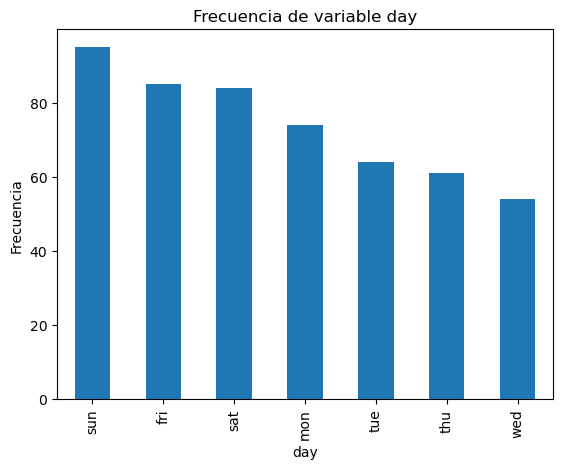

In [11]:
# Diagrama de barras de la variable "day"
frecuencia_day .plot(kind='bar')
plt.title('Frecuencia de variable day')
plt.xlabel('day')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
print(df_numerico.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


#### Estadísticos descriptivos básicos: media, mediana, desviación estandard,etc.

In [13]:
# Estadísticos descriptivos básicos de las variables numéricas
estadisticos = df_numerico.describe()
print(estadisticos)

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

C:\Users\DIAZOVIEDO\AppData\Local\Temp\ipykernel_4016\4192792595.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_numerico.hist(ax = ax)


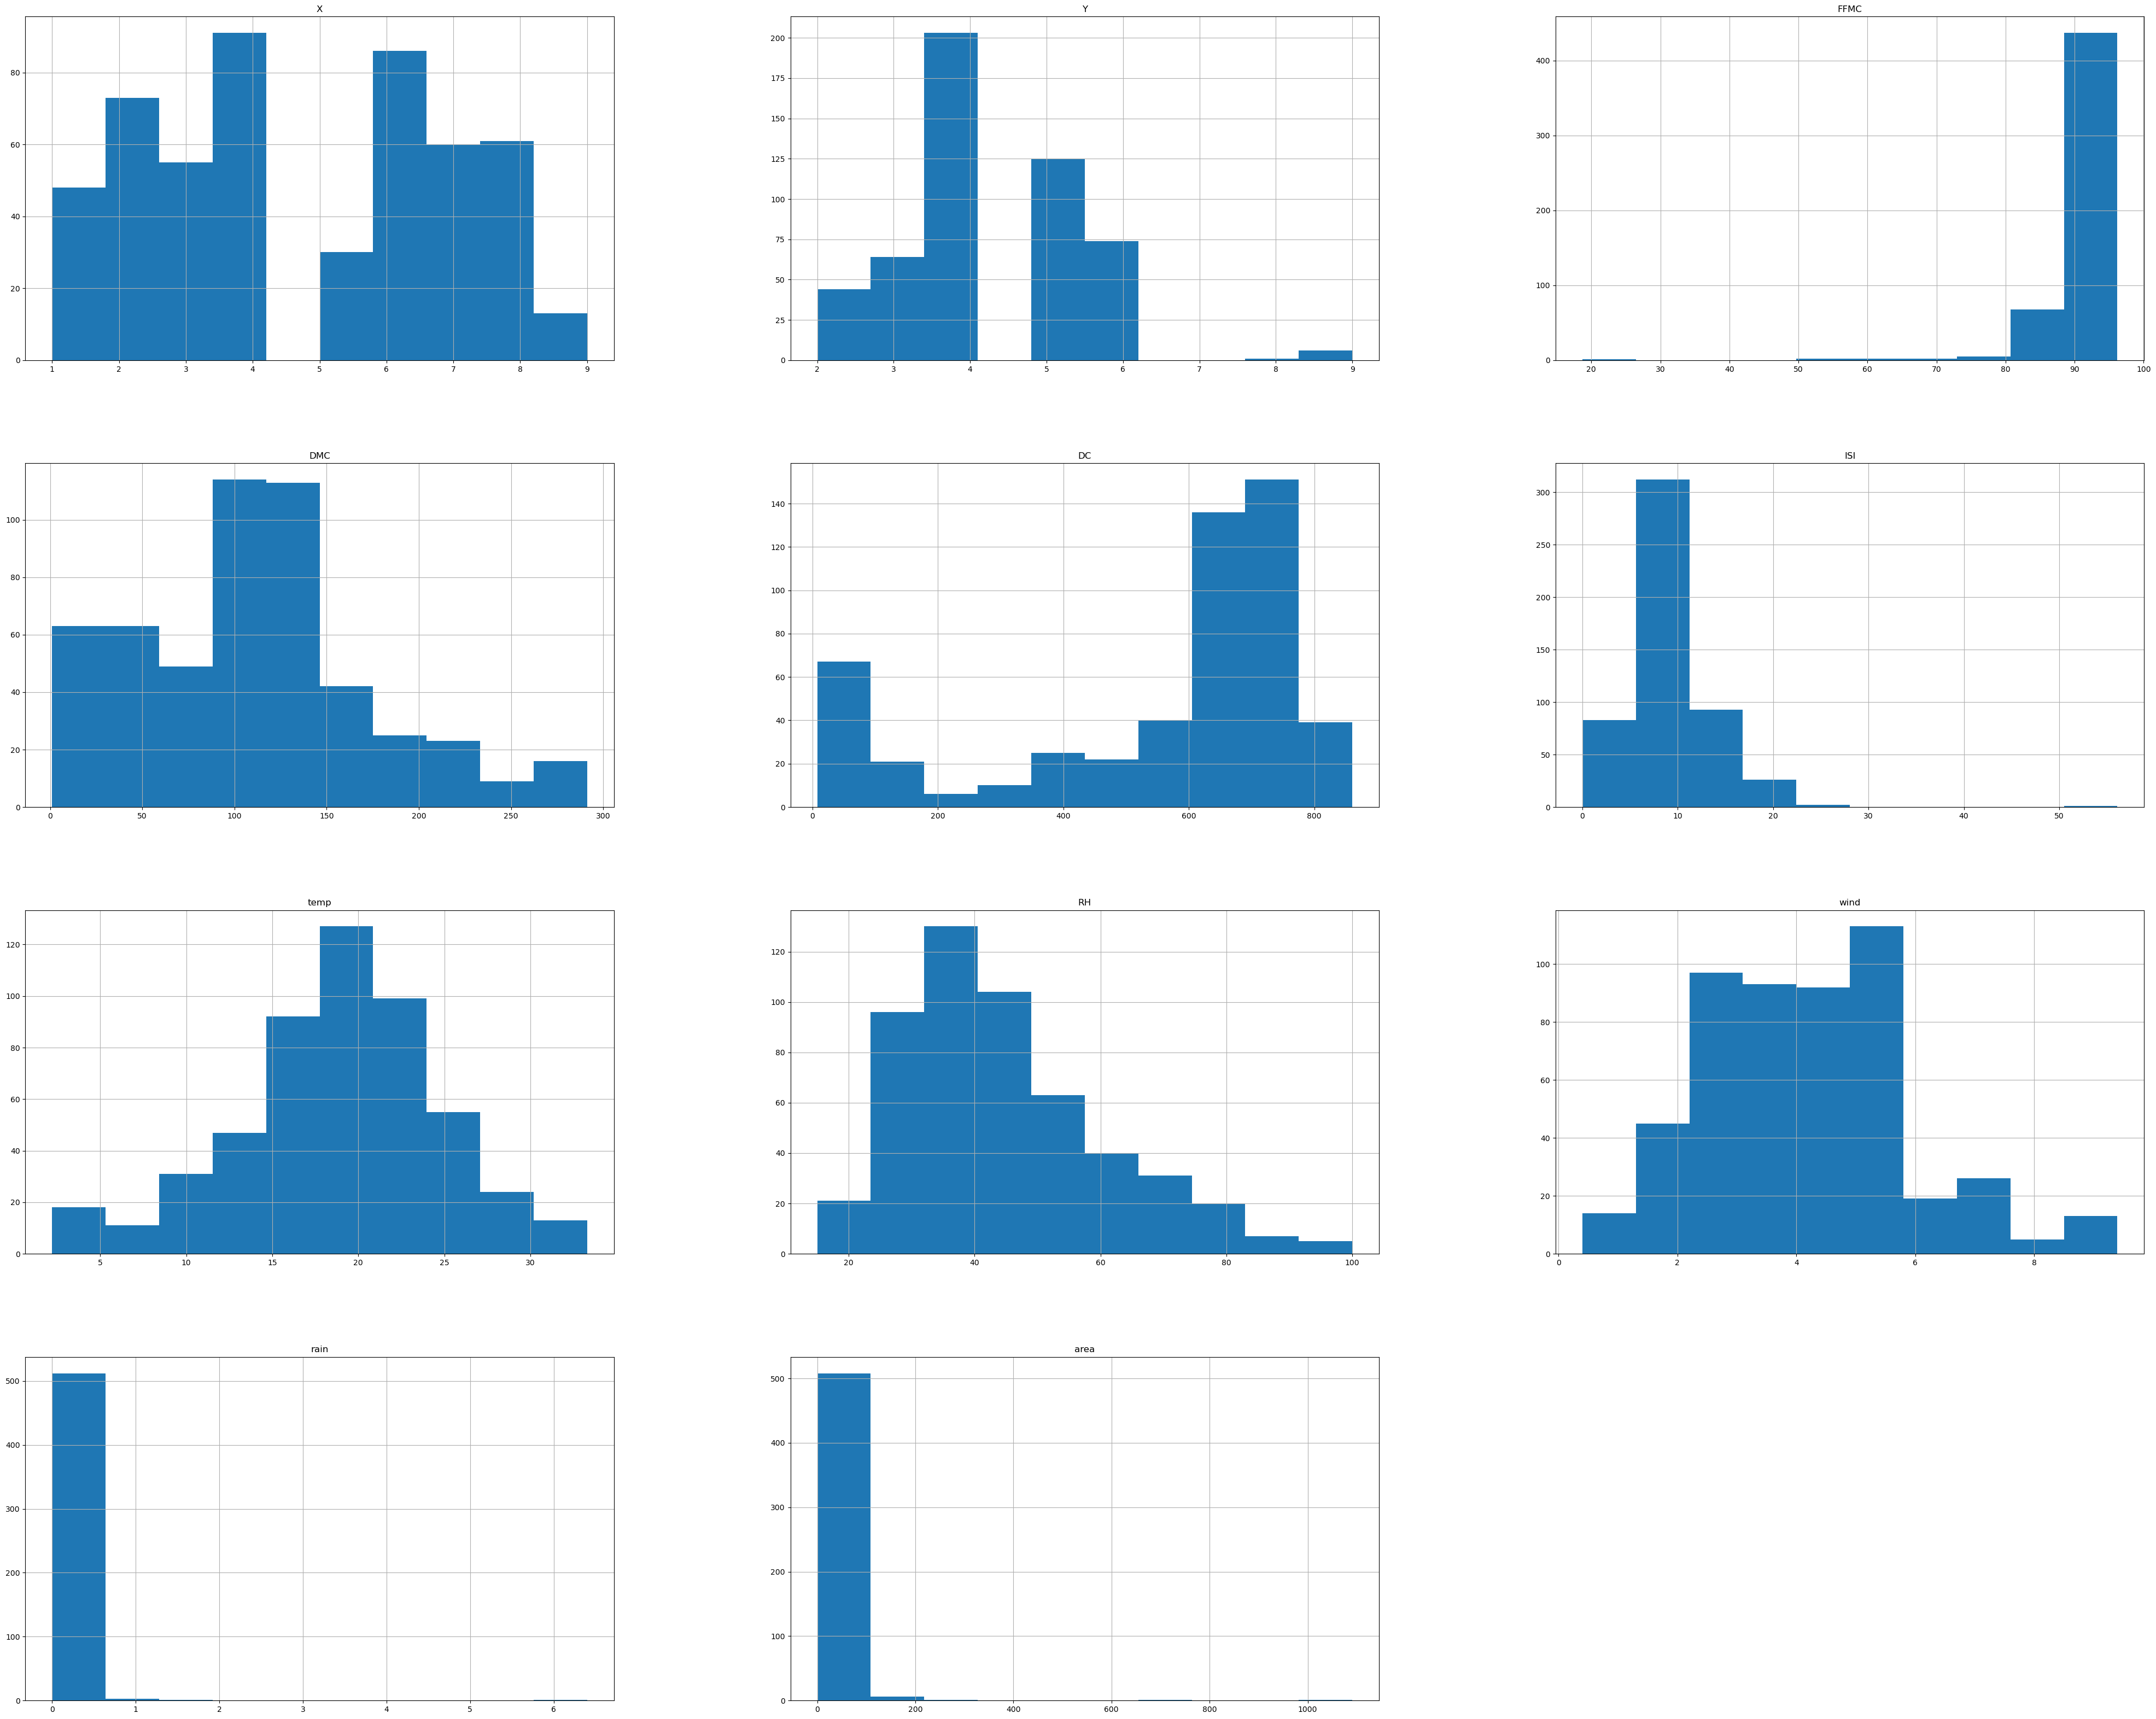

In [14]:
# Histograma del DataFrame df_numerico
fig = plt.figure(figsize = (50,40))
ax = fig.gca()
df_numerico.hist(ax = ax)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> A continuación, se presenta una breve descripción de cada variable y su distribución: X: variable numérica que representa la coordenada x del área del bosque en la que ocurrió el incendio. El valor mínimo es 1 y el máximo es 9, con una media de 4.67 y una desviación estándar de 2.31. La distribución no parece ser muy simétrica, ya que la mediana (50%) es 4, pero el valor máximo es 9.

Y: variable numérica que representa la coordenada y del área del bosque en la que ocurrió el incendio. El valor mínimo es 2 y el máximo es 9, con una media de 4.30 y una desviación estándar de 1.23. La distribución es similar a la de la variable X, con una mediana de 4 y un valor máximo de 9.

FFMC: variable numérica que representa el índice de humedad en el combustible fino muerto. El valor mínimo es 18.7 y el máximo es 96.2, con una media de 90.64 y una desviación estándar de 5.52. La distribución parece ser simétrica, ya que la media y la mediana (50%) son similares.

DMC: variable numérica que representa el índice de humedad en la materia orgánica muerta. El valor mínimo es 1.1 y el máximo es 291.3, con una media de 110.87 y una desviación estándar de 64.05. La distribución parece ser asimétrica a la derecha, ya que la media es mayor que la mediana (50%).

DC: variable numérica que representa el índice de humedad en la materia orgánica viva. El valor mínimo es 7.9 y el máximo es 860.6, con una media de 547.94 y una desviación estándar de 248.07. La distribución parece ser asimétrica a la derecha, ya que la media es mayor que la mediana (50%).

ISI: variable numérica que representa el índice de propagación de incendios. El valor mínimo es 0 y el máximo es 56.1, con una media de 9.02 y una desviación estándar de 4.56. La distribución parece ser asimétrica a la derecha, ya que la media es mayor que la mediana (50%).

temp: variable numérica que representa la temperatura en grados Celsius. El valor mínimo es 2.2 y el máximo es 33.3, con una media de 18.89 y una desviación estándar de 5.81. La distribución parece ser simétrica, ya que la media y la mediana (50%) son similares.

RH: variable numérica que representa la humedad relativa en porcentaje. El valor mínimo es 15 y el máximo es 100, con una media de 44.29 y una desviación estándar de 16.32. La distribución parece ser simétrica, ya que la media y la mediana (50%) son similares.

wind: La media de la variable "wind" es de 4.0176, con una desviación estándar de 1.7917. El valor mínimo es de 0.4 y el máximo es de 9.4. El percentil 25 es de 2.7 y el percentil 75 es de 4.9.La distribución de los datos alrededor de la mediana es simétrica, lo que sugiere que la mayoría de los valores de la variable están centrados alrededor de la mediana. Los valores extremos son 0.4 y 9.4, lo que indica que hay algunas observaciones que están lejos del resto de los valores.

rian: La variable "rain" tiene una media de 0.0217 y una desviación estándar de 0.2960. El valor mínimo es de 0 y el valor máximo es de 6.4. El percentil 25 es de 0 y el percentil 75 es de 0.La mayoría de los valores de la variable son cero, lo que indica que la mayoría de las observaciones no registraron precipitaciones. La desviación estándar es pequeña, lo que sugiere que los valores de la variable están muy concentrados en torno al cero.

area:La variable  tiene una media de 12.8473 y una desviación estándar de 63.6558. El valor mínimo es de 0 y el valor máximo es de 1090.84. El percentil 25 es de 0 y el percentil 75 es de 6.57. La distribución de los datos alrededor de la mediana es muy asimétrica a la derecha, lo que sugiere que la mayoría de los valores de la variable son cero o cercanos a cero, pero hay algunas observaciones que tienen valores muy altos de la variable. La desviación estándar es muy grande, lo que indica que los valores de la variable están muy dispersos.

<strong>Nota:</strong>
Después de realizar el análisis de los estadísticos descriptivos básicos, se puede sugerir que algunas de las variables tienen distribuciones simétricas, sin embargo, al observar los histogramas, se puede apreciar que la mayoría de ellos no tienen una distribución simétrica, presentando un pico y una cola hacia uno de sus lados. En particular, los histogramas de las variables X e Y tienen una distribución bimodal, sugiriendo que puede haber dos subgrupos o categorías diferentes dentro de los datos. Además, el histograma de las variables rain y area muestra una barra muy pronunciada, lo que indica que la mayoría de los datos se encuentra dentro del rango de valores en el que aparece dicha barra.
</div>

### Variables geoespaciales

X - coordenada espacial en el eje X dentro del mapa del parque Montesinho: de 1 a 9

Y - coordenada espacial en el eje Y dentro del mapa del parque Montesinho: de 2 a 9

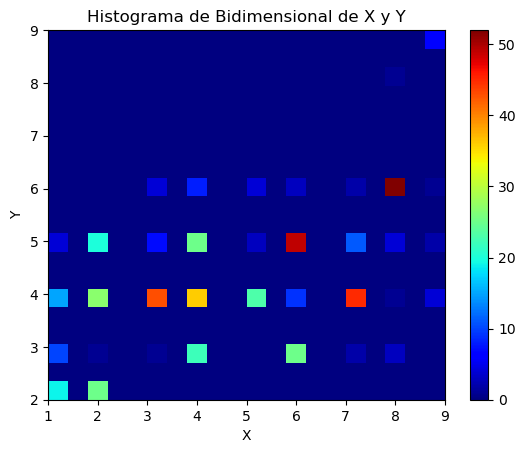

In [15]:
# Histograma bidimensional de las variables "X" y "Y"
plt.hist2d(df['X'], df['Y'], bins=(20, 20), cmap=plt.cm.jet)
plt.title('Histograma de Bidimensional de X y Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Se puede evidenciar que para las coordenadas espacial 8 en el eje X y la coordenada espacial 6 en el eje Y, del mapa del parque Montesinho   son las coordenadas donde mayor se presentan incendios, seguido por la coordenadas X=6 y Y=5, igualmente para las coordenadas X=7  Y=4  y X=3 y Y=4
</div>

## 2.2 Análisis exploratorio de los datos

En este apartado exploraremos la relación de los atributos descriptivos con la variable objetivo.
<br>
Nota: trataremos de forma diferente los atributos categóricos de los numéricos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada variable categórica, mostrad un gráfico donde superpondréis para cada categoría un histograma de los valores de la variable objetivo. Añadid una leyenda para saber a qué clase corresponde cada histograma
    
La finalidad es observar como se distribuye el valor de la variable objetivo en función de los valores de las categorías de cada variable categórica. De esta forma, identificaremos de manera visual y rápida si este atributo categórico está relacionado o no con diferentes valores de la respuesta.

<hr>
Sugerencia: podéis usar la función "hist" de la librería "matplotlib", así como su parámetro "alpha" (transparencia) para que se aprecien los histogramas superpuestos.
</div>

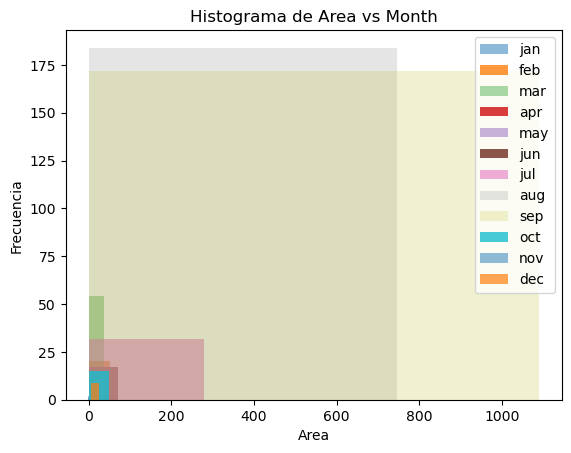

In [16]:

# Histograma con matplotlib para variable area y month

plt.hist(df[df['month'] == 'jan']['area'], bins=1, alpha=0.5, label='jan')
plt.hist(df[df['month'] == 'feb']['area'], bins=1, alpha=0.8, label='feb')
plt.hist(df[df['month'] == 'mar']['area'], bins=1, alpha=0.4, label='mar')
plt.hist(df[df['month'] == 'apr']['area'], bins=1, alpha=0.9, label='apr')
plt.hist(df[df['month'] == 'may']['area'], bins=1, alpha=0.5, label='may')
plt.hist(df[df['month'] == 'jun']['area'], bins=1, alpha=1, label='jun')
plt.hist(df[df['month'] == 'jul']['area'], bins=1, alpha=0.6, label='jul')
plt.hist(df[df['month'] == 'aug']['area'], bins=1, alpha=0.2, label='aug')
plt.hist(df[df['month'] == 'sep']['area'], bins=1, alpha=0.2, label='sep')
plt.hist(df[df['month'] == 'oct']['area'], bins=1, alpha=0.8, label='oct')
plt.hist(df[df['month'] == 'nov']['area'], bins=1, alpha=0.5, label='nov')
plt.hist(df[df['month'] == 'dec']['area'], bins=1, alpha=0.7, label='dec')
plt.legend(loc='upper right')
plt.xlabel('Area')
plt.ylabel('Frecuencia')
plt.title('Histograma de Area vs Month')
plt.show()

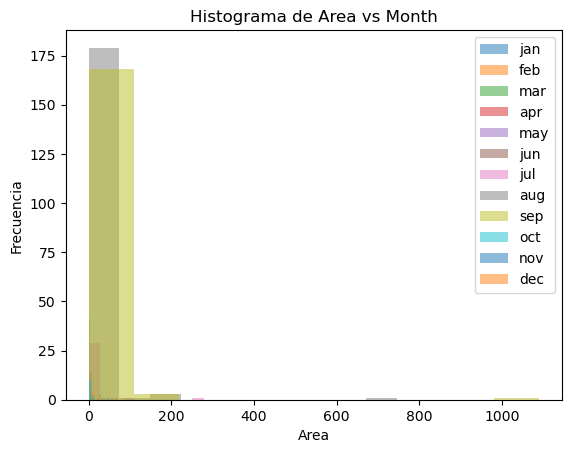

In [17]:
#opción 2,agragando 10 bins y utiliozando un bucle
# Definir una lista de los meses
meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Crear un bucle para iterar a través de los meses y trazar el histograma correspondiente
for mes in meses:
    plt.hist(df[df['month'] == mes]['area'], bins=10, alpha=0.5, label=mes)

# Agregar etiquetas y título
plt.legend(loc='upper right')
plt.xlabel('Area')
plt.ylabel('Frecuencia')
plt.title('Histograma de Area vs Month')

# Mostrar el gráfico
plt.show()

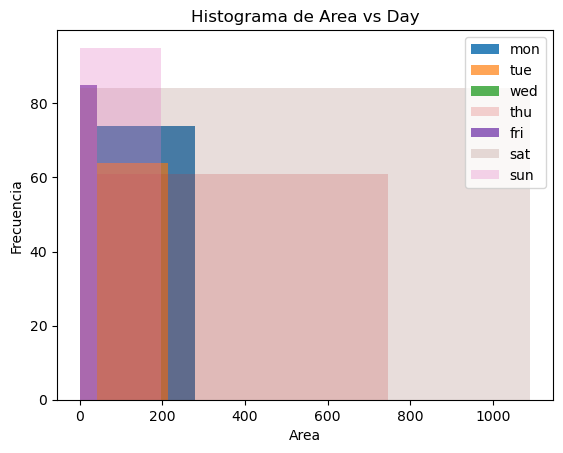

In [18]:
# Crear un histograma con matplotlib para variable area y day

plt.hist(df[df['day']=='mon']['area'], bins=1, alpha=0.9, label='mon')
plt.hist(df[df['day']=='tue']['area'], bins=1, alpha=0.7, label='tue')
plt.hist(df[df['day']=='web']['area'], bins=1, alpha=0.8, label='wed')
plt.hist(df[df['day']=='thu']['area'], bins=1, alpha=0.2, label='thu')
plt.hist(df[df['day']=='fri']['area'], bins=1, alpha=1, label='fri')
plt.hist(df[df['day']=='sat']['area'], bins=1, alpha=0.2, label='sat')
plt.hist(df[df['day']=='sun']['area'], bins=1, alpha=0.3, label='sun')


plt.legend(loc='upper right')
plt.xlabel('Area')
plt.ylabel('Frecuencia')
plt.title('Histograma de Area vs Day')
plt.show()

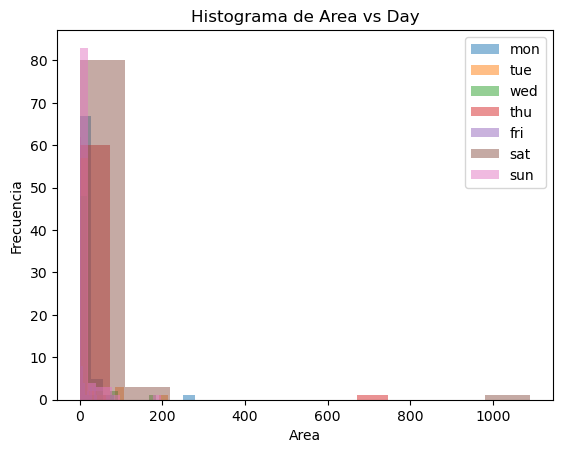

In [19]:
#opción 2,agragando 10 bins y utiliozando un bucle
# Definir una lista de los días
dias = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# Crear un bucle para iterar a través de los días y trazar el histograma correspondiente
for dia in dias:
    plt.hist(df[df['day'] == dia]['area'], bins=10, alpha=0.5, label=dia)

# Agregar etiquetas y título
plt.legend(loc='upper right')
plt.xlabel('Area')
plt.ylabel('Frecuencia')
plt.title('Histograma de Area vs Day')

# Mostrar el gráfico
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los histogramas, ¿te parece que los atributos categóricos tendrán algún peso a la hora de predecir la variable objetivo? ¿Porqué?. <strong>Respuesta:</strong> Los meses donde más se produce afectaciones de hectáreas son septiembre y octubre, entre los 2 suman el 87% aproximadamente de afectación de las hectáreas, y los días de los diferentes meses donde hay más porcentaje de afectación aproximado de hectáreas, son los días sábados 36%, el jueves con una afectación con el 17%, el domingo con 14%, para un total de 66% aproximadamente entre los 3 días.
Teniendo en cuenta la interpretación anterior, se puede considerar que estas variables categóricas pueden tener cierto peso en la predicción de la cantidad de hectáreas afectadas. Los meses de septiembre y octubre parecen ser los más críticos en términos de afectación de hectáreas, lo que sugiere que el mes puede ser un factor importante para considerar en la predicción. Además, los días de la semana también parecen estar relacionados con la cantidad de hectáreas afectadas, siendo los sábados, jueves y domingos los días con mayor porcentaje de afectación. En consecuencia, los atributos categóricos pueden ser relevantes para la predicción de la cantidad de hectáreas afectadas. Sin embargo, es importante tener en cuenta que otras variables, como las que tiene los valores de los índices , FFMC: Código de humedad de combustible fino (Fine Fuel Moisture Code), DCM: Código de humedad de material muerto (Duff Moisture Code), DC: Código de peligro de propagación aérea (Drought Code), ISI: Índice de propagación inicial (Initial Spread Index); e igualmente las variables de temp: Temperatura, RH: Humedad relativa, wind: Velocidad del viento y rain: Lluvia; también pueden ser importantes y deben ser considerados en conjunto para una predicción más precisa.


</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada categoría de las variables categóricas calculad los valores de media y desviación estandard de la variable objetivo. La finalidad de este ejercicio es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
<hr>
Sugerencia: podéis usar las funciones "mean" y "std" de la librería "numpy".
</div>

In [20]:

# Media y desviación estándar de la variable objetivo por cada categoría de la variable categórica "month"
grouped_by_month = df.groupby("month")
mean_by_month = grouped_by_month["area"].mean()
std_by_month = grouped_by_month["area"].std()

# imprimir los resultados
print("\033[1m Media y desviación estándar de la variable objetivo según cada categoría de la variable categórica 'month':\033[0m")
print("\033[1m Media\033[0m")
print(mean_by_month)
print("\033[1m Desviación estándar\033[0m")
print(std_by_month)

# Media y desviación estándar de la variable objetivo por cada categoría de la variable categórica "day"
grouped_by_day = df.groupby("day")
mean_by_day = grouped_by_day["area"].mean()
std_by_day = grouped_by_day["area"].std()

# resultados
print("\033[1m Media y desviación estándar de la variable objetivo según cada categoría de la variable categórica 'day':\033[0m")
print("\033[1m Media\033[0m")
print(mean_by_day)
print("\033[1m Desviación estándar\033[0m")
print(std_by_day)

 Media y desviación estándar de la variable objetivo según cada categoría de la variable categórica 'month':
 Media
month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64
 Desviación estándar
month
apr    19.929092
aug    60.364174
dec     6.610747
feb    12.342510
jan     0.000000
jul    50.849299
jun    16.884945
mar     9.140107
may    27.209469
nov          NaN
oct    13.699522
sep    87.648175
Name: area, dtype: float64
 Media y desviación estándar de la variable objetivo según cada categoría de la variable categórica 'day':
 Media
day
fri     5.261647
mon     9.547703
sat    25.534048
sun    10.104526
thu    16.345902
tue    12.621719
wed    10.714815
Name: area, dtype: float64
 Desviación estándar
day
fri     10.012083
mon     33.703562
sat    122.698840
sun     26.076032
thu     95.351052
tue     33

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todos los atributos numéricos (incluyendo los geoespaciales) y la respuesta.
</div>

In [21]:
# Correlación entre todas las variables numéricas
correlations = df.corr()

# Seleccionar la columna correspondiente a la variable respuesta y ordenar los resultados
result = correlations['area'].sort_values(ascending=False)

# Mostrar los resultados
print(result)

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64


C:\Users\DIAZOVIEDO\AppData\Local\Temp\ipykernel_4016\3023642568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Analisis Númerico:</strong> Se observa que la correlación entre la variable objetivo (area) y los atributos numéricos es bastante baja, siendo la correlación para la variable "temp", la mas alta con  0.0978. Esto sugiere que la mayoría de los atributos numéricos no están fuertemente relacionados con la variable objetivo, lo que significa que no son buenos predictores por sí solos para la variable objetivo. Sin embargo, esto no significa necesariamente que no haya una relación no lineal entre estas variables, y puede ser necesario utilizar técnicas más avanzadas para explorar cualquier posible relación
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables numéricas del conjunto de datos (incluyendo las geoespaciales). La finalidad de este ejercicio es poder observar y analizar las correlaciones entre las variables de manera gráfica.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

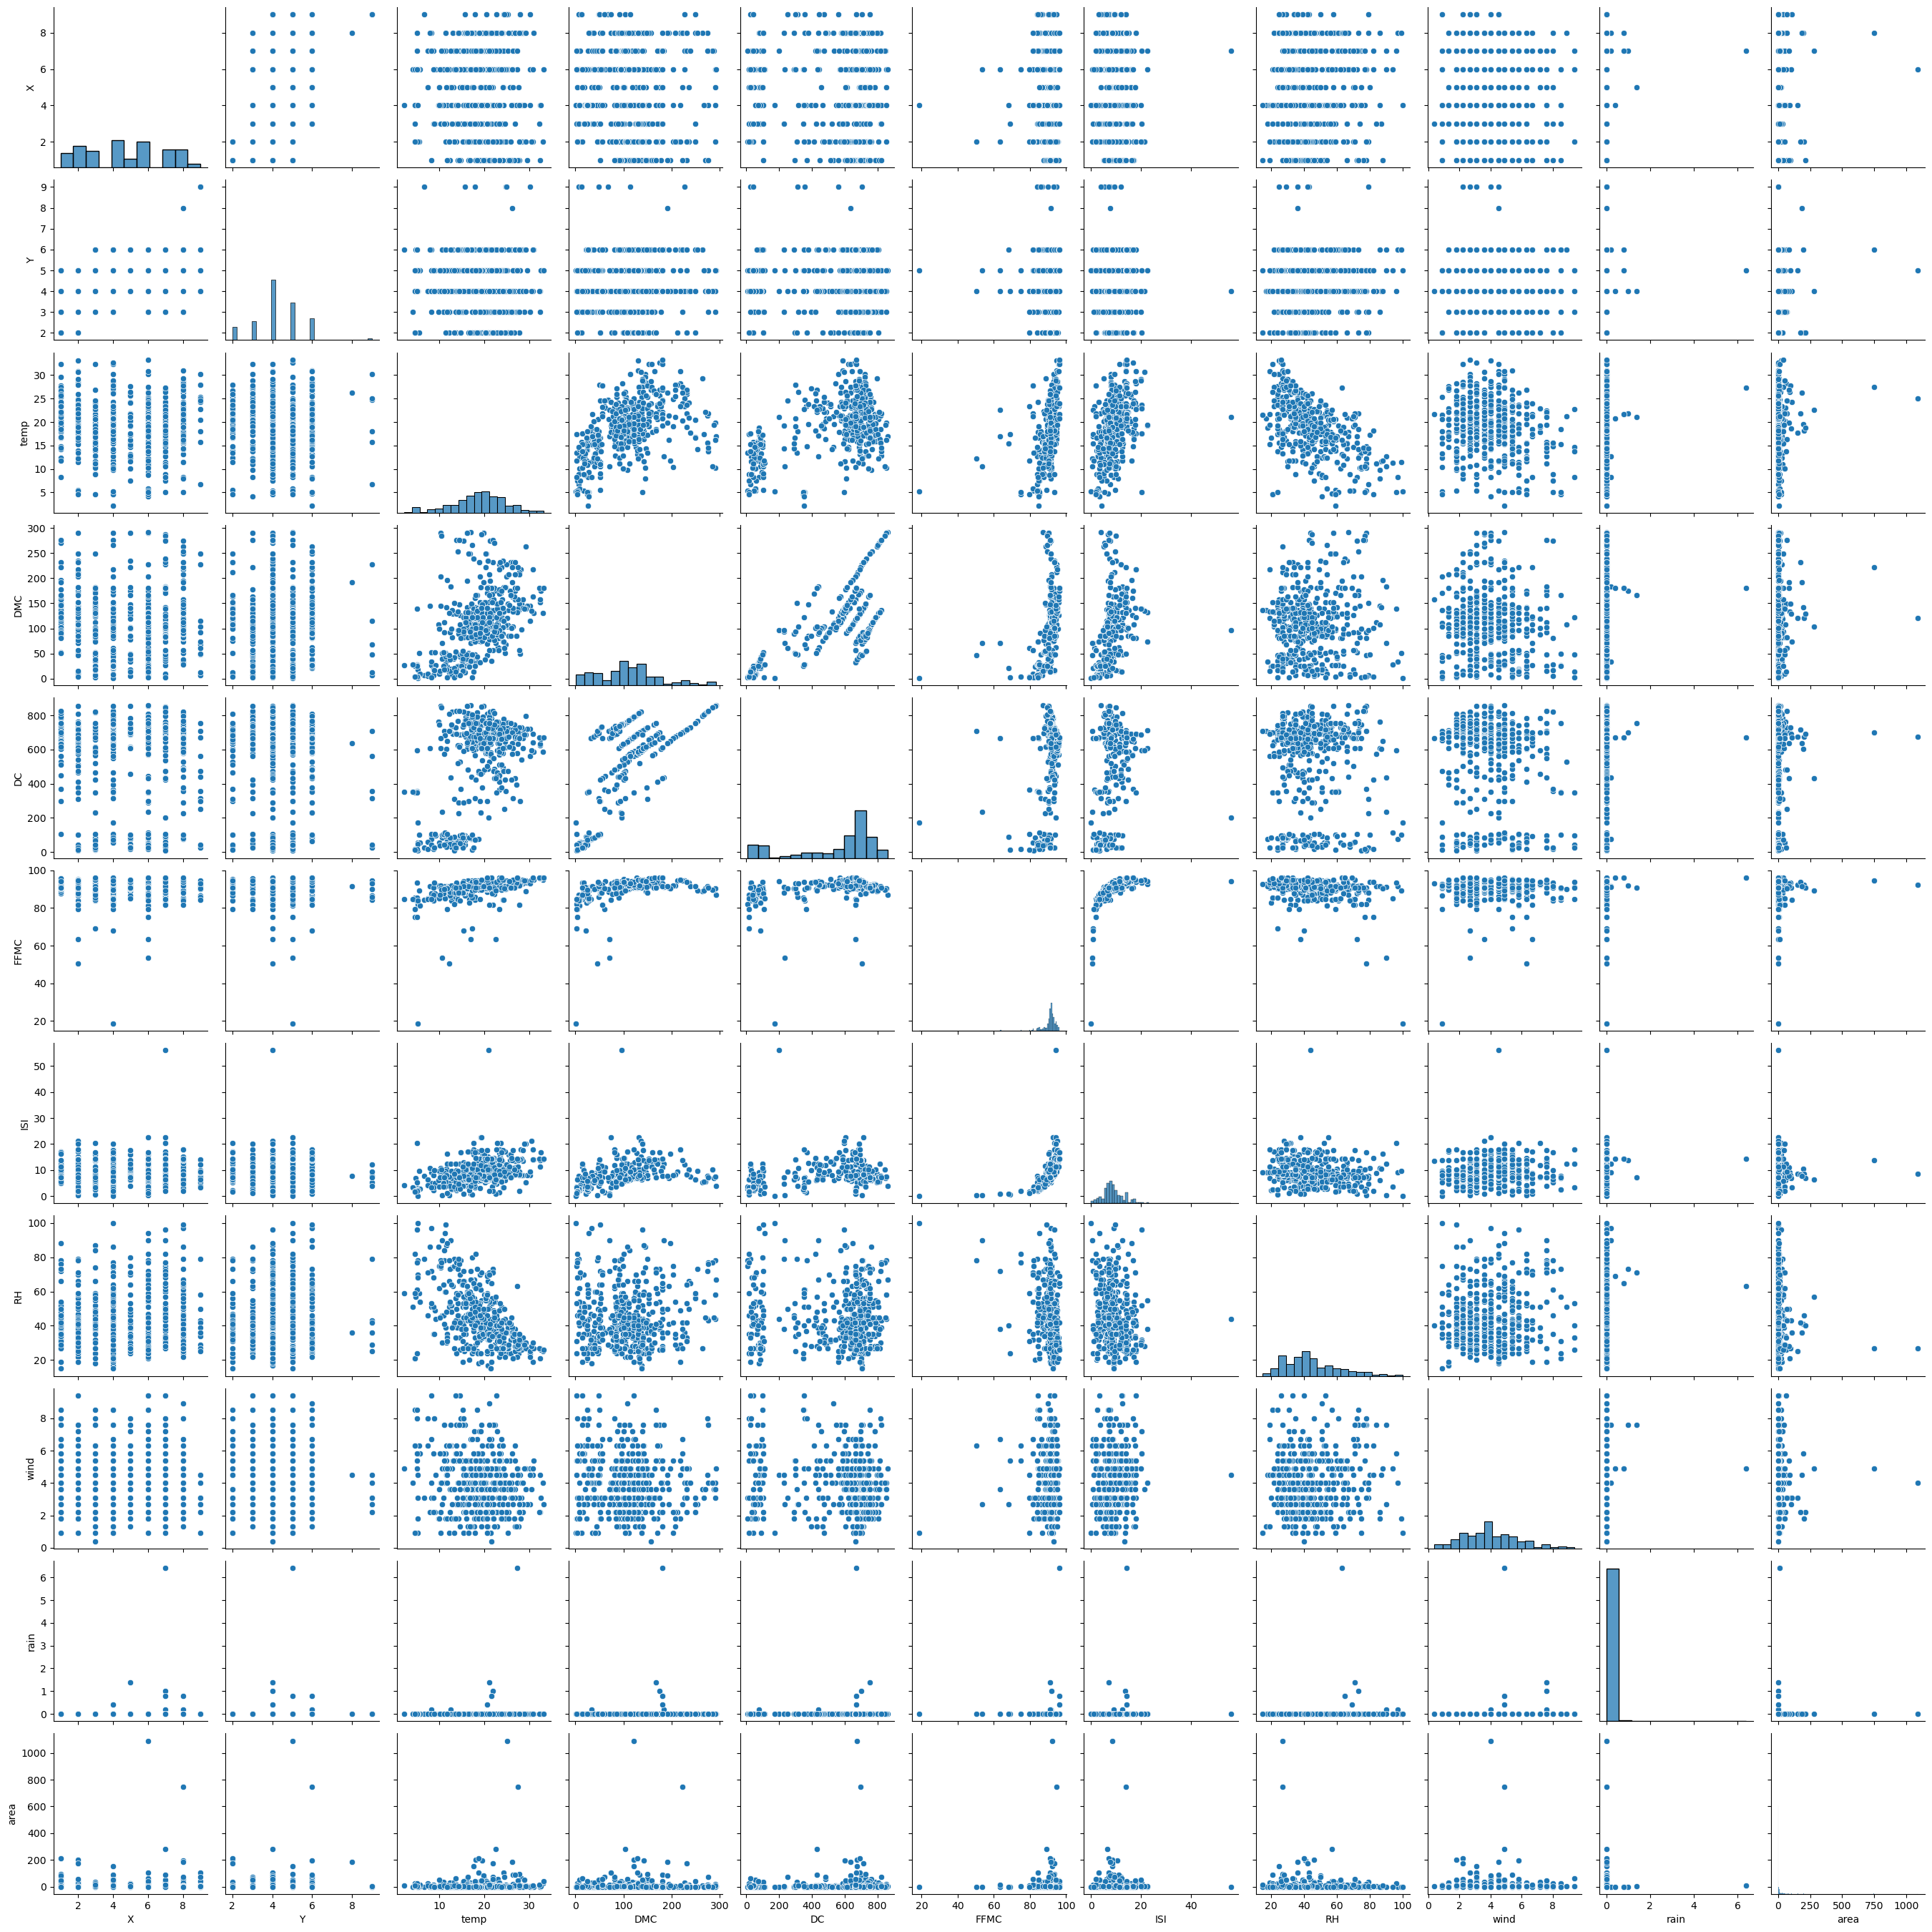

In [22]:
sns.pairplot(df, vars=['X','Y','temp', 'DMC', 'DC', 'FFMC', 'ISI','RH', 'wind', 'rain', 'area'])

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente. <strong>Respuesta:</strong>Observando los gráficos, no se logra identificar altas correlaciones, al contrario, los datos están muy dispersos, siendo así la relación lineal bajas. Se podría profundizar específicamente en la correlación entre las variables DMC y DC, para determinar si existe una correlación directa positiva.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identificad los 2 atributos que tienen una correlación más fuerte con la respuesta y los 3 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto).
    
Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 5 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadid la representación de una regresión lineal que fite los puntos.
        
<hr>Sugerencia: podéis usar la función "regplot" de la librería 'seaborn'.
</div>

In [23]:
# Calcular matriz de correlación
correlations = df.corr()['area'].drop('area').sort_values(ascending=False)

# Seleccionar los dos atributos con la correlación más fuerte
strongest_corr = correlations.head(2)
print("Atributos con la correlación más fuerte:\n", strongest_corr)

Atributos con la correlación más fuerte:
 temp    0.097844
DMC     0.072994
Name: area, dtype: float64


C:\Users\DIAZOVIEDO\AppData\Local\Temp\ipykernel_4016\3254319635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['area'].drop('area').sort_values(ascending=False)


In [24]:
# Seleccionar los tres atributos con la correlación más débil
weakest_corr = correlations.tail(3)
print("Atributos con la correlación más débil:\n", weakest_corr)

Atributos con la correlación más débil:
 ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64


<Axes: xlabel='temp', ylabel='area'>

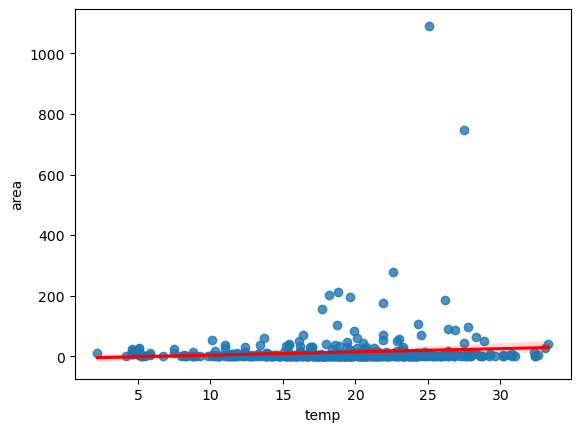

In [25]:
# Scatter plot y regresión lineal para las temp
sns.regplot(x='temp', y='area', data=df, line_kws={"color": "red"})

<Axes: xlabel='DMC', ylabel='area'>

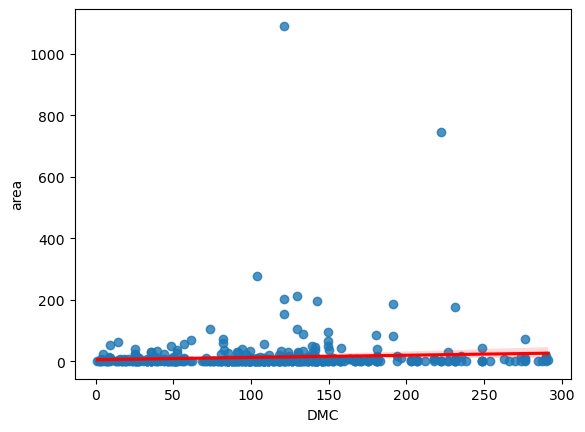

In [26]:
# Scatter plot y regresión lineal para las RH
sns.regplot(x='DMC', y='area', data=df, line_kws={"color": "red"})

<Axes: xlabel='ISI', ylabel='area'>

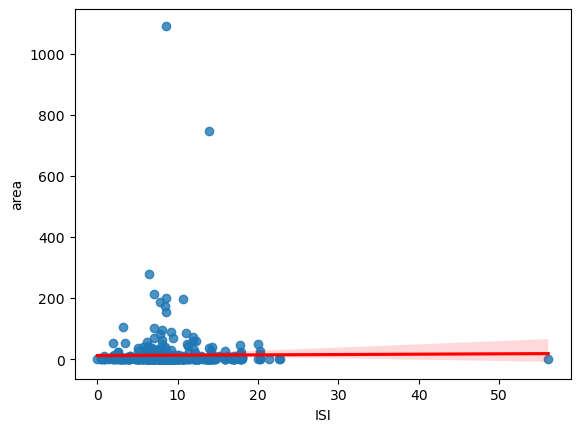

In [27]:
# Scatter plot y regresión lineal para la wind
sns.regplot(x='ISI', y='area', data=df, line_kws={"color": "red"})


<Axes: xlabel='rain', ylabel='area'>

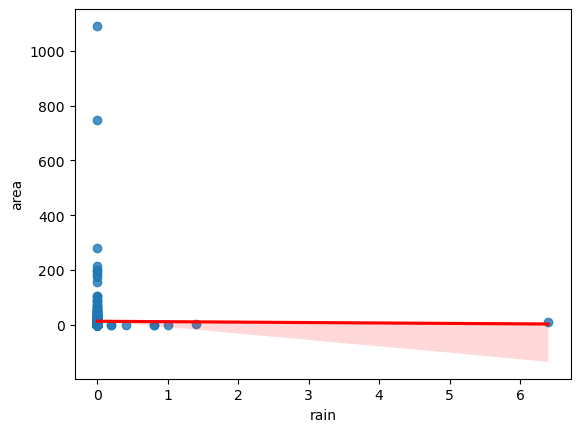

In [28]:
# Scatter plot y regresión lineal para la variable rain
sns.regplot(x='rain', y='area', data=df, line_kws={"color": "red"})

<Axes: xlabel='RH', ylabel='area'>

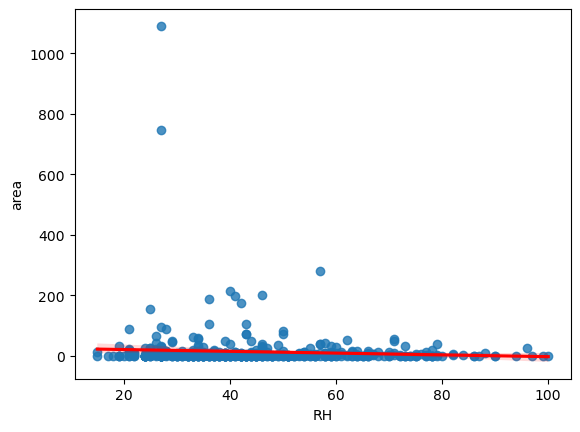

In [29]:
# Scatter plot y regresión lineal para la variable RH
sns.regplot(x="RH", y="area", data=df, line_kws={"color": "red"})

# 3. Preprocesado de los datos (3 puntos)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores. En este apartado:
<li>Transformaremos las variables categóricas en varias variables binarias, una para cada categoría.</li>
<li>Estandarizaremos los valores de los atributos descriptivos para que sus escalas no sean muy diferentes.</li>
<li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elimina los atributos categóricos del conjunto de datos y en su lugar introduce la transformación de dichos atributos a tantas variables binarias como categorías tengan.
<hr>
Sugerencia: utilizad la función "get_dummies" de "pandas".
</div>

In [30]:
#Transformación de las variables categóricas
df_transformado = pd.get_dummies(df, columns=['month', 'day'])

# resultado
print(df_transformado.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  month_apr  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0          0   

   month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_fri  day_mon  \
0          1          0          0          0     

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos.
<hr>
Sugerencia: utilizad "StandardScaler" de "preprocessing".
</div>

In [31]:
# Estandarizar los atributos descriptivos
scaler = StandardScaler()
atributos_descriptivos_estandarizados = scaler.fit_transform(df_transformado)

# Convertir el array resultante a un dataframe con los mismos nombres de columnas
df_atributos_descriptivos_estandarizados = pd.DataFrame(data=atributos_descriptivos_estandarizados, columns=df_transformado.columns)

print(df_atributos_descriptivos_estandarizados.head())



          X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain     area  month_apr  month_aug  month_dec  \
0  0.411724  1.498614 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   
1 -0.692456 -1.741756 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   
2 -0.692456 -1.518282 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   
3  3.233519 -0.009834  0.603155 -0.20202  -0.133103  -0.743339  -0.133103   
4  3.356206 -1.238940 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0  -0.200603  -

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

In [32]:
#Separación de los atributos descriptivos y la variable objetivo
# atributos descriptivos
X = df_atributos_descriptivos_estandarizados.drop('area', axis=1) 
# variable objetivo
y = df_atributos_descriptivos_estandarizados['area'] 

#dividir los datos en subconjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica si la decisión de transformar el conjunto de datos (variables categóricas y estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es una buena idea. 
<hr>
<strong>Respuesta:</strong> 
En general, es preferible realizar la separación del conjunto de datos original en subconjuntos de entrenamiento y prueba antes de aplicar cualquier transformación en los datos. Esto se debe a que, si se realiza la transformación antes de la división, es posible introducir sesgos en los datos y, por lo tanto, obtener un modelo de aprendizaje automático menos preciso. Al dividir el conjunto de datos antes de aplicar las transformaciones, se asegura que los subconjuntos de entrenamiento y prueba tengan la misma distribución de datos, lo que evita la aparición de sesgos. Una vez dividido el conjunto de datos, se pueden aplicar las transformaciones solo al subconjunto de entrenamiento y luego aplicar las mismas transformaciones al subconjunto de prueba. Esta práctica es especialmente importante cuando se trabajan con variables categóricas y se realiza la codificación one-hot, ya que si se realiza antes de la división, es posible que algunas categorías no estén presentes en uno de los subconjuntos. Además, es importante tener en cuenta que la estandarización de las variables también debe realizarse solo en el subconjunto de entrenamiento, para evitar la fuga de información del conjunto de prueba.

</div>

# 4. Reducción de la dimensionalidad (2 puntos)

Con el propósito de comprobar visualmente la distribución de la variable objetivo teniendo en cuenta todos los atributos descriptivos a la vez, vamos a reducir la dimensionalidad del problema a solamente dos atributos que serán la proyección de los atributos descriptivos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generad un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la variable objetivo usando la escala de colores. El objetivo es visualizar la variación de la variable objetivo en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

In [33]:
print(df_atributos_descriptivos_estandarizados.head())

          X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain     area  month_apr  month_aug  month_dec  \
0  0.411724  1.498614 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   
1 -0.692456 -1.741756 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   
2 -0.692456 -1.518282 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   
3  3.233519 -0.009834  0.603155 -0.20202  -0.133103  -0.743339  -0.133103   
4  3.356206 -1.238940 -0.073268 -0.20202  -0.133103  -0.743339  -0.133103   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0  -0.200603  -

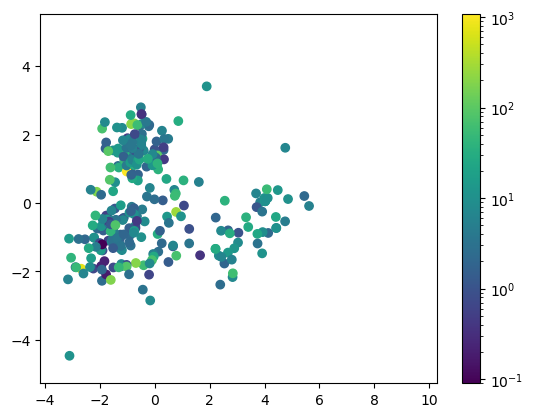

In [34]:
# Seleccionar todas las columnas excepto la variable objetivo
X = df_atributos_descriptivos_estandarizados.drop('area', axis=1)

# Inicializar PCA con dos componentes principales
pca = PCA(n_components=2)

# Aplicar PCA al conjunto de datos
X_pca = pca.fit_transform(X)

# Generar el gráfico con la variable objetivo como escala de colores
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df['area'], norm=matplotlib.colors.LogNorm())
plt.colorbar(scatter)
plt.show()



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la variable objetivo usando una escala de colores.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

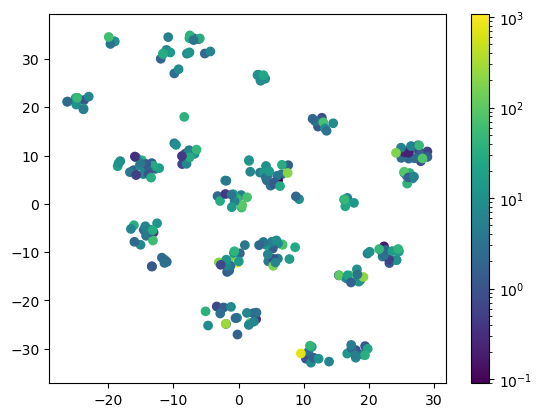

In [35]:
# Seleccion todas las columnas excepto la variable objetivo, se relizo anteriormente, y quedo guardado en X


# Definir el modelo TSNE y especificar los parámetros
tsne = TSNE(n_components=2, learning_rate=200, perplexity=30, random_state=42)

# Aplicar TSNE
X_tsne = tsne.fit_transform(X)

# Generar el gráfico con la variable objetivo como escala de colores
fig, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['area'], norm=matplotlib.colors.LogNorm())
plt.colorbar(scatter)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de la variable objetivo y visualizar diferenciadamente áreas de indendio grandes o pequeñas? ¿Si utilizásemos las 2 nuevas variables para predecir la variable objetivo, serían buenos los resultados obtenidos?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
    
<strong>Respuesta:</strong>    Observando los dos gráficos, podemos decir que la reducción de dimensionalidad ha funcionado razonablemente bien. En ambos gráficos podemos observar cierta separación de las áreas quemadas grandes y pequeñas, aunque también hay una superposición considerable entre ellas.

En cuanto a si las dos nuevas dimensiones explican adecuadamente la variación de la variable objetivo, podemos decir que no podemos estar completamente seguros, ya que siempre habrá cierta información perdida al reducir la dimensionalidad. Además, la variable objetivo puede estar influenciada por factores que no están incluidos en las variables descriptivas, como la ubicación geográfica, la temporada del año, etc.

Si utilizáramos las dos nuevas variables para predecir la variable objetivo, los resultados no serían muy buenos, ya que aunque hay cierta separación entre las áreas quemadas grandes y pequeñas, sigue habiendo una gran cantidad de solapamiento, lo que dificultaría la predicción precisa de la variable objetivo.

Los resultados son diferentes con los dos métodos porque utilizan enfoques diferentes para reducir la dimensionalidad. PCA busca las direcciones de mayor varianza en los datos originales y las usa como nuevas dimensiones, mientras que t-SNE se enfoca en preservar las distancias entre los puntos en las dimensiones originales, lo que puede ser más adecuado para datos no lineales o con estructuras intrínsecas complejas.
</div>

# 5. Entrenamiento y test (1 punto)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Random Forest para regresión, con el objetivo de predecir la variable objetivo y evaluar la precisión obtenida con el modelo. Para ello:
<ul>
    <li>Entrenaremos el modelo con el conjunto de entrenamiento y veremos qué tal se comporta tanto con el subconjunto de entrenamiento como con el de test.</li>
    <li>Analizaremos si el resultado obtenido tiene sentido y veremos si se puede mejorar de alguna forma.</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos preprocesado (variables categóricas y estandarización) sin aplicar reducción de la dimensionalidad:
<ul>
    <li>Definid un modelo Random Forest (fijando n_estimators=100 y random_state=seed).</li>
    <li>Mostrad la precisión del modelo tanto en el subconjunto de entrenamiento como de test.</li>
</ul>
<hr>
Sugerencia: para entrenar un modelo random forest podéis usar "RandomForestRegressor" de sklearn.<br>
Sugerencia: para mostrar la precisión del modelo podéis usar el método "score" del propio modelo.<br>
</div>

In [36]:
#Definir un modelo Random Forest con n_estimators=100 y random_state=seed
rf_model = RandomForestRegressor(n_estimators=100, random_state=seed)

#Entrenar el modelo con el método "fit" 
rf_model.fit(X_train, y_train)

#Precisión del modelo tanto en el subconjunto de entrenamiento como de test
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print(f"Precisión en entrenamiento: {train_score}")
print(f"Precisión en test: {test_score}")




Precisión en entrenamiento: 0.8217077140166364
Precisión en test: -0.07382898674059413


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica por qué la precisión del modelo sobre los valores de entrenamiento y test presentan esos valores.  <strong>Respuesta:</strong> La precisión del modelo en el subconjunto de entrenamiento es relativamente alta (0.82), lo que indica que el modelo se ajusta bastante bien a los datos de entrenamiento. Sin embargo, la precisión del modelo en el subconjunto de test es muy baja (-0.07), lo que indica que el modelo no generaliza bien a datos nuevos y no vistos durante el entrenamiento.

Este resultado sugiere que el modelo está sobreajustando (overfitting ) los datos de entrenamiento, es decir, está aprendiendo los detalles específicos de los datos de entrenamiento en lugar de aprender patrones generales que puedan aplicarse a nuevos datos. Una posible causa de esto puede ser que el modelo esté demasiado complejo y esté memorizando los datos de entrenamiento en lugar de aprender una representación generalizable. Es posible que sea necesario ajustar los hiperparámetros del modelo,para mejorar la capacidad de generalización del modelo.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> discutid qué técnicas podríais aplicar para mejorar la situación actual del modelo.<strong>Respuesta:</strong> Para mejorar la situación actual del modelo, es necesario abordar el problema del sobreajuste y mejorar la precisión en el conjunto de prueba. Para lograr esto, podemos aplicar diferentes técnicas como la regularización, que consiste en penalizar los coeficientes grandes y evitar el sobreajuste. Ejemplos de regularización son la regresión de Ridge, la regresión Lasso y la elastic net. Otra técnica es ajustar los hiperparámetros del modelo, como el número de árboles, la profundidad máxima del árbol, la tasa de aprendizaje, etc. El objetivo es encontrar los hiperparámetros que proporcionen el mejor rendimiento en el conjunto de prueba.

También podemos utilizar técnicas de selección de características para seleccionar las características más relevantes y reducir la dimensionalidad del conjunto de datos. Esto puede ayudar a reducir el sobreajuste y mejorar la precisión. Además, podemos entrenar un conjunto de modelos y combinar sus predicciones para mejorar el rendimiento. Un ejemplo de conjunto de modelos es el método de bagging, que utiliza múltiples modelos de árbol de decisión entrenados en diferentes subconjuntos del conjunto de datos.

Por último, si es posible, se puede obtener más datos para mejorar la capacidad del modelo para generalizar. Esto puede ayudar a reducir el sobreajuste y mejorar la precisión en el conjunto de prueba.
</div>